In [ ]:
# TODO(developer): Uncomment and set the following variables
# project_id = 'PROJECT_ID_HERE'
# compute_region = 'COMPUTE_REGION_HERE'
# dataset_display_name = 'DATASET_DISPLAY_NAME'
# path = 'gs://path/to/file.csv' or 'bq://project_id.dataset.table_id'

from google.cloud import automl_v1beta1 as automl

client = automl.TablesClient(project=project_id, region=compute_region)

response = None
if path.startswith("bq"):
    response = client.import_data(
        dataset_display_name=dataset_display_name, bigquery_input_uri=path
    )
else:
    # Get the multiple Google Cloud Storage URIs.
    input_uris = path.split(",")
    response = client.import_data(
        dataset_display_name=dataset_display_name,
        gcs_input_uris=input_uris,
    )

print("Processing import...")
# synchronous check of operation status.
print("Data imported. {}".format(response.result()))

In [ ]:
# xlrd is needed to load excel files
!pip install xlrd
!pip install psycopg2
!pip install xlsxwriter
!pip install --upgrade sklearn
!pip install scikit-learn
!pip install pandas-profiling[notebook]
!pip install plotly==4.14.3

     |████████████████████████████████| 153kB 4.1MB/s 
Requirement already up-to-date: sklearn in /usr/local/lib/python3.7/dist-packages (0.0)
     |████████████████████████████████| 13.2MB 289kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [1]:
# Setup
!pip install -q wordcloud
import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import pandas as pd
import matplotlib.pyplot as plt
import io
import unicodedata
import numpy as np
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
# Constraints on tokens
MIN_STR_LEN = 3
RE_VALID = '[a-zA-Z]'

In [ ]:
# Upload from google drive
from google.colab import files
uploaded = files.upload()
print("len(uploaded.keys():", len(uploaded.keys()))

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

# Get list of quotes
df_bullying = pd.read_csv(io.StringIO(uploaded['confidential'].decode('utf-8')), sep='\t')
  
# Display
print("df_bullying:")
print(df_bullying.head().to_string())
print(df_bullying.describe())

# Convert quotes to list
li_sarcasm = df_bullying['comment'].tolist()
print()
print("len(li_sarcasm):", len(li_sarcasm))

In [ ]:
# Get stopwords, stemmer and lemmatizer
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# Remove accents function
def remove_accents(data):
    return ''.join(x for x in unicodedata.normalize('NFKD', data) if x in string.ascii_letters or x == " ")

# Process all quotes
li_tokens = []
li_token_lists = []
li_lem_strings = []

for i,text in enumerate(li_quotes):
    # Tokenize by sentence, then by lowercase word
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # Process all tokens per quote
    li_tokens_quote = []
    li_tokens_quote_lem = []
    for token in tokens:
        # Remove accents
        t = remove_accents(token)

        # Remove punctuation
        t = str(t).translate(string.punctuation)
        li_tokens_quote.append(t)
        
        # Add token that represents "no lemmatization match"
        li_tokens_quote_lem.append("-") # this token will be removed if a lemmatization match is found below

        # Process each token
        if t not in stopwords:
            if re.search(RE_VALID, t):
                if len(t) >= MIN_STR_LEN:
                    # Note that the POS (Part Of Speech) is necessary as input to the lemmatizer 
                    # (otherwise it assumes the word is a noun)
                    pos = nltk.pos_tag([t])[0][1][:2]
                    pos2 = 'n'  # set default to noun
                    if pos in DI_POS_TYPES:
                      pos2 = DI_POS_TYPES[pos]
                    
                    stem = stemmer.stem(t)
                    lem = lemmatizer.lemmatize(t, pos=pos2)  # lemmatize with the correct POS
                    
                    if pos in POS_TYPES:
                        li_tokens.append((t, stem, lem, pos))

                        # Remove the "-" token and append the lemmatization match
                        li_tokens_quote_lem = li_tokens_quote_lem[:-1] 
                        li_tokens_quote_lem.append(lem)

    # Build list of token lists from lemmatized tokens
    li_token_lists.append(li_tokens_quote)
    
    # Build list of strings from lemmatized tokens
    str_li_tokens_quote_lem = ' '.join(li_tokens_quote_lem)
    li_lem_strings.append(str_li_tokens_quote_lem)
    
# Build resulting dataframes from lists
df_token_lists = pd.DataFrame(li_token_lists)

print("df_token_lists.head(5):")
print(df_token_lists.head(5).to_string())

# Replace None with empty string
for c in df_token_lists:
    if str(df_token_lists[c].dtype) in ('object', 'string_', 'unicode_'):
        df_token_lists[c].fillna(value='', inplace=True)

df_lem_strings = pd.DataFrame(li_lem_strings, columns=['lem quote'])

print()
print("")
print("df_lem_strings.head():")
print(df_lem_strings.head().to_string())

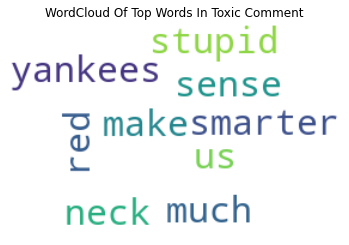

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("So-what Your just stupid red neck and you make no sense, to us much smarter yankees!")

# Create the wordcloud object
wordcloud = WordCloud(width=280, height=180, background_color='white', max_font_size=30, min_font_size=20).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("WordCloud Of Top Words In Toxic Comment")
plt.show()

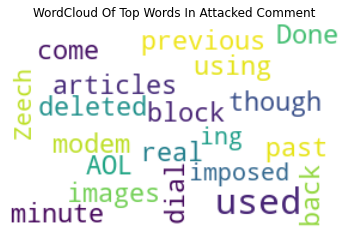

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("`Done that in the past with previous images he used, though as some were used in real articles they could not all be deleted. He has since come back on a dial up modem using AOL. A 15 minute block was imposed. Zeech. What a f***ing asshole he is.")

# Create the wordcloud object
wordcloud = WordCloud(width=280, height=180, background_color='white', max_font_size=30, min_font_size=20).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("WordCloud Of Top Words In Attacked Comment")
plt.show()

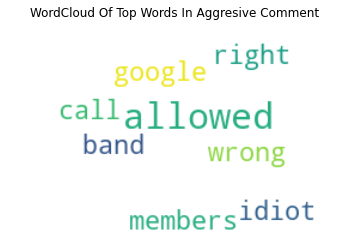

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("So google's right about the band members being wrong, i am not allowed to call you an idiot but if i was allowed to i would.")

# Create the wordcloud object
wordcloud = WordCloud(width=280, height=180, background_color='white', max_font_size=30, min_font_size=20).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("WordCloud Of Top Words In Aggresive Comment")
plt.show()

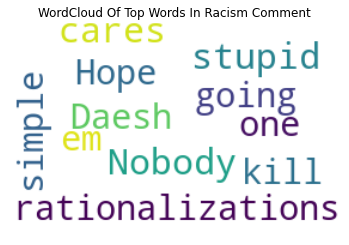

In [ ]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=("Nobody cares about your stupid rationalizations. We are simple going to kill all the Daesh. Hope you are one of em")

# Create the wordcloud object
wordcloud = WordCloud(width=280, height=180, background_color='white', max_font_size=30, min_font_size=20).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("WordCloud Of Top Words In Racism Comment")
plt.show()

Text(0.5, 1.0, 'Network Diagram Of Dependency Parsing For Toxic Comment')

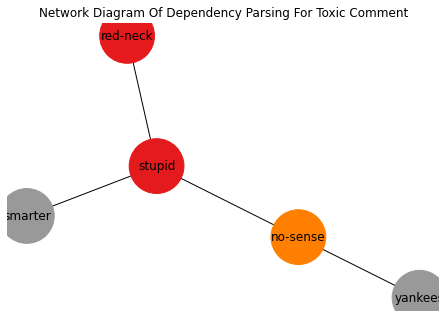

In [ ]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
# So-what Your just stupid red neck and you make no sense, to us much smarter yankees!
df = pd.DataFrame({ 'from':['stupid', 'red-neck', 'no-sense','stupid'], 'to':['smarter', 'stupid', 'yankees','no-sense']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['stupid', 'red-neck', 'no-sense','smarter','yankees'], 'myvalue':['group1','group1','group2','group3','group3'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=3000)
plt.title("Network Diagram Of Dependency Parsing For Toxic Comment")

Text(0.5, 1.0, 'Network Diagram Of Dependency Parsing For Attacked Comment')

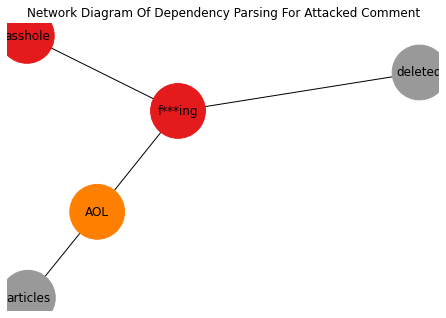

In [ ]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
# Done that in the past with previous images he used, though as some were used in real articles they could not all be deleted. He has since come back on a dial up modem using AOL. A 15 minute block was imposed. Zeech. What a f***ing asshole he is.
df = pd.DataFrame({ 'from':['f***ing', 'asshole', 'AOL','f***ing'], 'to':['deleted', 'f***ing', 'articles','AOL']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['f***ing', 'asshole', 'AOL','deleted','articles'], 'myvalue':['group1','group1','group2','group3','group3'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=3000)
plt.title("Network Diagram Of Dependency Parsing For Attacked Comment")

Text(0.5, 1.0, 'Network Diagram Of Dependency Parsing For Aggresive Comment')

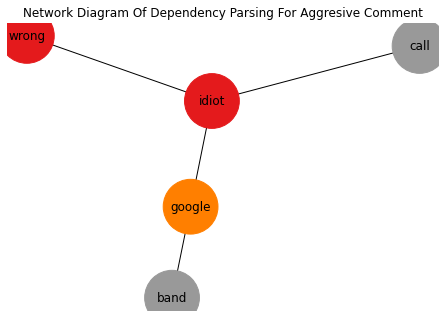

In [ ]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
# So google's right about the band members being wrong, i am not allowed to call you an idiot but if i was allowed to i would.
df = pd.DataFrame({ 'from':['idiot', 'wrong', 'google','idiot'], 'to':['call', 'idiot', 'band','google']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['idiot', 'wrong', 'google','call','band'], 'myvalue':['group1','group1','group2','group3','group3'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=3000)
plt.title("Network Diagram Of Dependency Parsing For Aggresive Comment")

Text(0.5, 1.0, 'Network Diagram Of Dependency Parsing For Racism Comment')

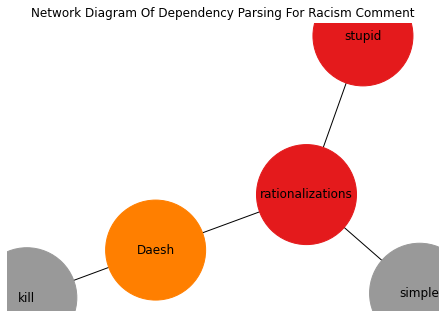

In [ ]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
# Nobody cares about your stupid rationalizations. We are simple going to kill all the Daesh. Hope you are one of em
df = pd.DataFrame({ 'from':['rationalizations', 'stupid', 'Daesh','rationalizations'], 'to':['simple', 'rationalizations', 'kill','Daesh']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['rationalizations', 'stupid', 'Daesh','simple','kill'], 'myvalue':['group1','group1','group2','group3','group3'] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# And I need to transform my categorical column in a numerical value: group1->1, group2->2...
carac['myvalue']=pd.Categorical(carac['myvalue'])
carac['myvalue'].cat.codes
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color=carac['myvalue'].cat.codes, cmap=plt.cm.Set1, node_size=10000)
plt.title("Network Diagram Of Dependency Parsing For Racism Comment")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.769532 (0.052966)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
Naive Bayes: 0.755178 (0.042766)
SVM: 0.760424 (0.052931)


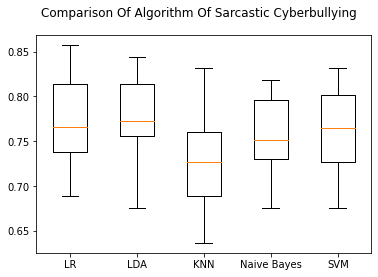

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "confidential"
dataframe = pandas.read_csv(url)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison Of Algorithm Of Sarcastic Cyberbullying')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

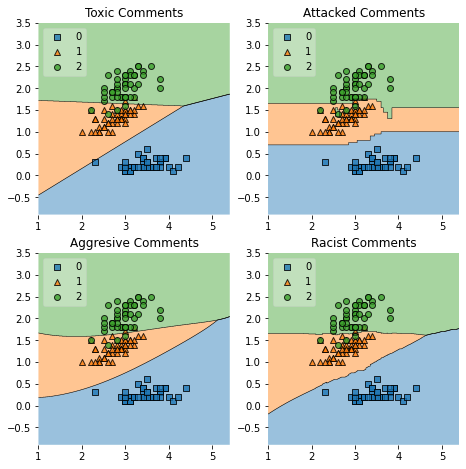

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clf1 = LogisticRegression(random_state=0)
clf2 = RandomForestClassifier(random_state=0)
clf3 = SVC(random_state=0, probability=True)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
                              weights=[2, 1, 1], voting='soft')

elcf = 'cofidential'

# Plotting Decision Regions

gs = gridspec.GridSpec(3, 6)
fig = plt.figure(figsize=(24, 12))

labels = ['Toxic Comments',
          'Attacked Comments',
          'Aggresive Comments',
          'Racist Comments']

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()